# Direct (Forward) Kinematics, Inverse Kinematics, and Trajectory Generation

This Jupyter notebook serves as an example of using the package for direct (forward) kinematics, inverse kinematics, and trajectory generation for driving joint. Run it live on Binder platform clicking on the following badge: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/hucik14/rl-issues/HEAD?labpath=jupyter_ntbs%2Fsynthesis_bennett.ipynb)

In [1]:
# in case of errors, make sure to have the latest version of the rational-linkages package installed (uncomment the following line and run the cell - it will install the package into your current environment)
# !pip install --upgrade rational-linkages

In [2]:
# initial import of the required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from rational_linkages import (RationalMechanism, Plotter, TransfMatrix, MotionInterpolation, PointHomogeneous)

Synthesize Bennett mechanism for given poses. 

The poses are given as transformation matrices. They are using European convention - projective coordinates are on first line and translation vector is in the left column.

In [3]:
p0 = TransfMatrix()
p1 = TransfMatrix.from_vectors(approach_z=[-0.0362862, 0.400074, 0.915764],
                               normal_x=[0.988751, -0.118680, 0.0910266],
                               origin=[0.033635718, 0.09436004, 0.03428654])
p2 = TransfMatrix.from_vectors(approach_z=[-0.0463679, -0.445622, 0.894020],
                               normal_x=[0.985161, 0.127655, 0.114724],
                               origin=[-0.052857769, -0.04463076, -0.081766])
poses = [p0, p1, p2]

for pose in poses:
    print('Pose p' + str(poses.index(pose)) + ' as matrix:')
    print(pose)
    print('Pose p' + str(poses.index(pose)) + ' as dual quaternion:')
    print(pose.matrix2dq())
    print('')

Pose p0 as matrix:
[[1., 0., 0., 0.],
 [0., 1., 0., 0.],
 [0., 0., 1., 0.],
 [0., 0., 0., 1.]]
Pose p0 as dual quaternion:
[1. 0. 0. 0. 0. 0. 0. 0.]

Pose p1 as matrix:
[[ 1.          ,  0.          ,  0.          ,  0.          ],
 [ 0.033635718 ,  0.9887513371,  0.1451003257, -0.0362862   ],
 [ 0.09436004  , -0.1186800739,  0.9087660701,  0.400074    ],
 [ 0.03428654  ,  0.0910265534, -0.3912673323,  0.915764    ]]
Pose p1 as dual quaternion:
[ 1.         -0.20752241 -0.03338667 -0.06917412 -0.00625114 -0.01412658
 -0.04478577 -0.02637269]

Pose p2 as matrix:
[[ 1.          ,  0.          ,  0.          ,  0.          ],
 [-0.052857769 ,  0.9851611934, -0.1652496366, -0.0463679   ],
 [-0.04463076  ,  0.1276549492,  0.886073015 , -0.445622    ],
 [-0.081766    ,  0.1147241778,  0.4330902558,  0.89402     ]]
Pose p2 as dual quaternion:
[ 1.          0.23337395 -0.04278385  0.07779145 -0.00839342  0.02991396
  0.02980047  0.03454444]



Construct curve C(t) from poses and factorize it to obtain Bennett mechanism

In [4]:
c = MotionInterpolation.interpolate(poses)
m = RationalMechanism(c.factorize())

print('C(t):')
for el in m.symbolic:
    print(el)

C(t):
1.0*t**2 - 0.922574869995743*t + 0.225924549239908
0.0527249049627104 - 0.115676760251889*t
-0.000461912058302805*t - 0.00966592241914592
0.017574998351491 - 0.0385589465748264*t
-0.00189628034930318
0.00675829849055086 - 0.0110435917278808*t
0.00673265685568852 - 0.0203184052196818*t
0.0078044375096668 - 0.0158045842647264*t


Inverse kinematics

In [5]:
theta1 = m.inverse_kinematics(p1)
theta2 = m.inverse_kinematics(p2)
print('Joint angle for pose 1 in rad:', theta1)
print('Joint angle for pose 2 in rad:', theta2)

Joint angle for pose 1 in rad: 0.3308269645302005
Joint angle for pose 2 in rad: 5.8928021107639585


Direct (forward) kinematics

In [6]:
pose1_as_dq = m.forward_kinematics(theta1)
pose2_as_dq = m.forward_kinematics(theta2)

pose1_as_matrix = pose1_as_dq.dq2matrix()
pose2_as_matrix = pose2_as_dq.dq2matrix()

print('Pose 1 as matrix:')
print(pose1_as_matrix)
print('Pose 2 as matrix:')
print(pose2_as_matrix)


Pose 1 as matrix:
[[ 1.          0.          0.          0.        ]
 [ 0.03363572  0.98875134  0.14510033 -0.03628621]
 [ 0.09436004 -0.11868008  0.90876608  0.40007406]
 [ 0.03428654  0.09102655 -0.39126731  0.91576419]]
Pose 2 as matrix:
[[ 1.          0.          0.          0.        ]
 [-0.05285777  0.9851612  -0.16524962 -0.04636788]
 [-0.04463076  0.12765493  0.886073   -0.44562188]
 [-0.081766    0.11472418  0.43309029  0.89401966]]


Simple comparision of input/output matrices

In [7]:
error_pose1 = np.linalg.norm(pose1_as_matrix - p1.array())
error_pose2 = np.linalg.norm(pose2_as_matrix - p2.array())
print('Error in direct kinematics for pose 1:', error_pose1)
print('Error in direct kinematics for pose 2:', error_pose2)

Error in direct kinematics for pose 1: 2.0370757604724798e-07
Error in direct kinematics for pose 2: 3.602034565993871e-07


Plot mechanism 

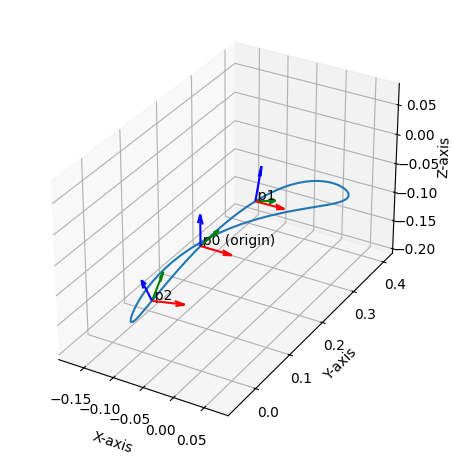

In [8]:
p = Plotter(jupyter_notebook=True, steps=500, arrows_length=0.05)
p.plot(m.curve(), interval='closed', label='Rational curve')
p.plot(p0, label='p0 (origin)')
p.plot(p1, label='p1')
p.plot(p2, label='p2')
p.show()

In [9]:
# if in script mode (not in Jupyter notebook), use the following line to display interactive plot

# p = Plotter(interactive=True, steps=500, arrows_length=0.05, joint_range_lim=0.1)
# p.plot(m, show_tool=True)
# p.plot(p0, label='p0 (origin)')
# p.plot(p1, label='p1')
# p.plot(p2, label='p2')
# p.show()

# after calculating the joint angles, the mechanism can be animated using the following code
# p.animate_angles(pos, sleep_time=0.5)

Trajectory generation


In [10]:
total_time_of_motion = 4.  # seconds
frequency = 20  # Hz
num_points = int(total_time_of_motion * frequency)

Joint-space point-to-point trajectory (quintic polynomial scaling)

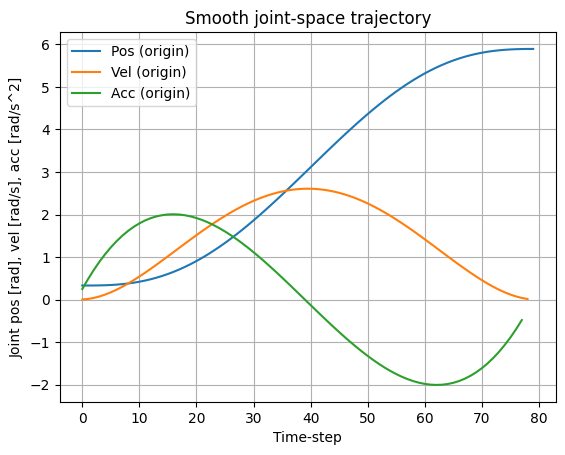

In [11]:
pos, vel, acc = m.traj_p2p_joint_space(joint_angle_start=theta1,
                                       joint_angle_end=theta2,
                                       time_sec=total_time_of_motion,
                                       num_points=num_points,
                                       generate_csv=False)

%matplotlib inline
plt.figure()
plt.plot(pos)
plt.plot(vel)
plt.plot(acc)
plt.xlabel('Time-step')
plt.ylabel('Joint pos [rad], vel [rad/s], acc [rad/s^2]')
plt.legend(['Pos (origin)', 'Vel (origin)', 'Acc (origin)'])
plt.title('Smooth joint-space trajectory')
plt.grid()
plt.show()

Smooth tool equidistant motion

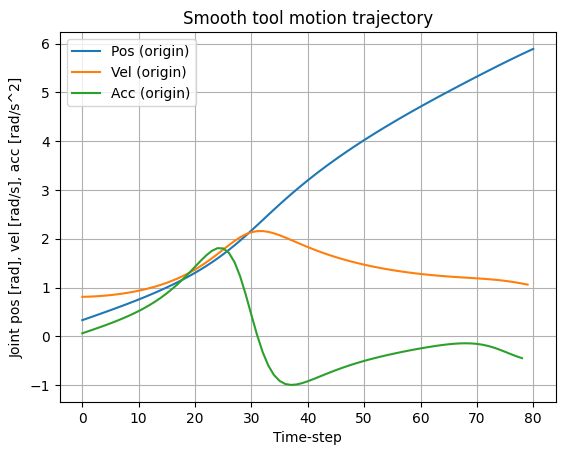

In [12]:
pos_t, vel_t, acc_t = m.traj_smooth_tool(joint_angle_start=theta1,
                                         joint_angle_end=theta2,
                                         time_sec=total_time_of_motion,
                                         num_points=num_points,
                                         generate_csv=False)

plt.figure()
plt.plot(pos_t)
plt.plot(vel_t)
plt.plot(acc_t)
plt.xlabel('Time-step')
plt.ylabel('Joint pos [rad], vel [rad/s], acc [rad/s^2]')
plt.legend(['Pos (origin)', 'Vel (origin)', 'Acc (origin)'])
plt.title('Smooth tool motion trajectory')
plt.grid()
plt.show()

Define a new TCP point that will be taken into account

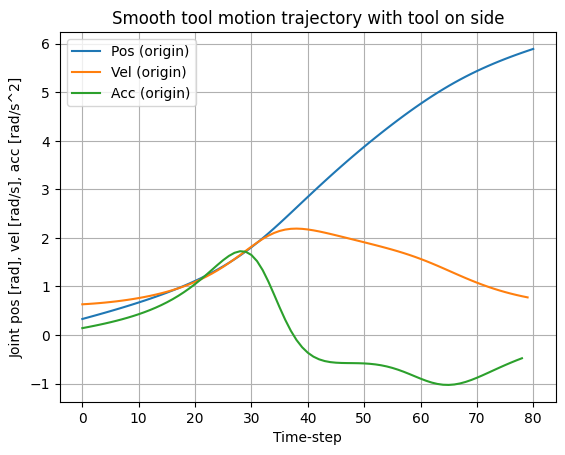

In [13]:

t_new_tool = PointHomogeneous([1, 0, -0.17, 0])

pos_t2, vel_t2, acc_t2 = m.traj_smooth_tool(joint_angle_start=theta1,
                                            joint_angle_end=theta2,
                                            time_sec=total_time_of_motion,
                                            point_of_interest=t_new_tool,
                                            num_points=num_points,
                                            generate_csv=False)

plt.figure()
plt.plot(pos_t2)
plt.plot(vel_t2)
plt.plot(acc_t2)
plt.xlabel('Time-step')
plt.ylabel('Joint pos [rad], vel [rad/s], acc [rad/s^2]')
plt.legend(['Pos (origin)', 'Vel (origin)', 'Acc (origin)'])
plt.title('Smooth tool motion trajectory with tool on side')
plt.grid()
plt.show()

Comparison of all trajectories

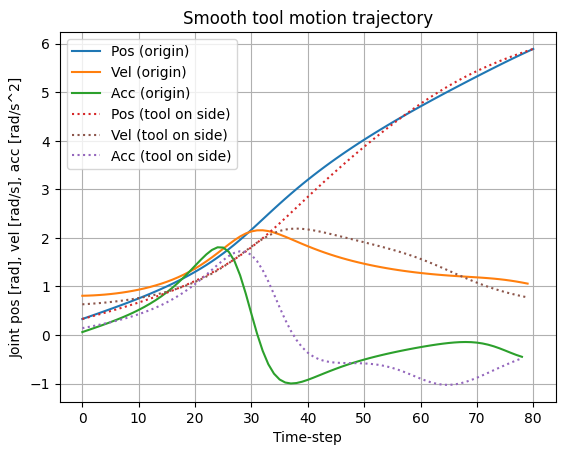

In [14]:
plt.figure()
plt.plot(pos_t, 'C0')
plt.plot(vel_t, 'C1')
plt.plot(acc_t, 'C2')
plt.plot(pos_t2, 'C3', linestyle=':')
plt.plot(vel_t2, 'C5', linestyle=':')
plt.plot(acc_t2, 'C4', linestyle=':')
plt.xlabel('Time-step')
plt.ylabel('Joint pos [rad], vel [rad/s], acc [rad/s^2]')
plt.title('Smooth tool motion trajectory')
plt.legend(['Pos (origin)', 'Vel (origin)', 'Acc (origin)',
            'Pos (tool on side)', 'Vel (tool on side)', 'Acc (tool on side)'])
plt.grid()
plt.show()